In [7]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

# Training dataset

In [8]:
df = pd.read_csv('../../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

df['schema'] = df[cols_cat].groupby(by=cols_cat).ngroup().values

In [9]:
df.head()

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
0,11,20.274241,13.753708,1.397849,14.829915,-11,13.459523,-13.458053,-0.178631,0.087476,...,10.726935,1.457106,-9.715445,-4.306151,-13,19.941356,-1.752761,8.496227,17.955180,1
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,...,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509,2
2,11,51.267102,27.995380,26.039697,34.154190,-11,43.013595,-7.827488,-17.337374,-38.578689,...,123.210062,0.378806,-41.833551,115.890116,-13,46.883635,-20.546697,33.131228,26.042638,1
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,...,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281,2
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,...,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380,2


In [10]:
df.columns

Index(['pdg1', 'E1', 'p1x', 'p1y', 'p1z', 'pdg2', 'E2', 'p2x', 'p2y', 'p2z',
       'pdg3', 'E3', 'p3x', 'p3y', 'p3z', 'pdg4', 'E4', 'p4x', 'p4y', 'p4z',
       'schema'],
      dtype='object')

In [6]:
schemas = [['E1', 'p1x', 'p1y', 'p1z'], 
           ['E2', 'p2x', 'p2y', 'p2z'],
           ['E3', 'p3x', 'p3y', 'p3z'], 
           ['E4', 'p4x', 'p4y', 'p4z']]
schemas

[['E1', 'p1x', 'p1y', 'p1z'],
 ['E2', 'p2x', 'p2y', 'p2z'],
 ['E3', 'p3x', 'p3y', 'p3z'],
 ['E4', 'p4x', 'p4y', 'p4z']]

In [22]:
data = None
for c in itertools.permutations(schemas):
    d = df[np.array(c).flatten().tolist()]
    data = d if data is None else pd.concat([data, d], axis=0)
data.shape

(480000, 16)

In [23]:
e_sum_sq = np.power(data['E1'] + data['E2'] + data['E3'] + data['E4'], 2)
x_sum_sq = np.power(data['p1x'] + data['p2x'] + data['p3x'] + data['p4x'], 2)
y_sum_sq = np.power(data['p1y'] + data['p2y'] + data['p3y'] + data['p4y'], 2)
z_sum_sq = np.power(data['p1z'] + data['p2z'] + data['p3z'] + data['p4z'], 2)
m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

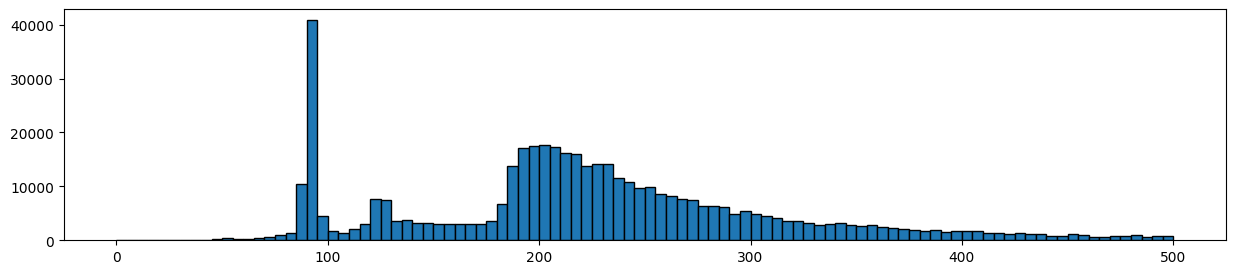

In [24]:
plt.figure(figsize=(15, 3))
plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
plt.show()

In [37]:
data.to_csv('four_guys.csv', header=None, sep=" ", index=None)

# Generated dataset

In [67]:
gf = pd.read_csv('four_guys.csv.gen_events.csv', sep=" ", header=None, names=np.array(schemas).flatten().tolist())

In [68]:
gf.head()

,E1,p1x,p1y,p1z,E2,p2x,p2y,p2z,E3,p3x,p3y,p3z,E4,p4x,p4y,p4z
0,151.235931,-20.877029,-23.406227,-147.148041,45.095352,21.737921,38.444565,-9.325152,204.113235,-38.591526,18.768795,-199.820007,91.350449,37.725903,-33.713100,-76.339378
1,57.029137,52.264568,-13.768289,9.253166,54.635189,23.365923,10.801774,-50.282806,140.656143,-90.422035,26.804371,105.571739,40.453888,14.857174,-23.868570,28.923023
2,30.917063,17.553745,19.959316,15.801039,25.485197,19.609535,-17.457724,4.581297,19.162195,-5.567791,-9.691221,16.074783,71.802567,-31.750525,7.031778,63.388988
3,189.341141,65.323761,21.240438,-174.470657,17.544035,14.387651,1.169817,8.495605,161.683609,-25.221376,-12.457820,-160.119583,59.396133,-54.535488,-10.392295,-17.855608
4,73.704880,-62.249287,-6.118970,40.616009,72.749138,-39.509724,37.045475,-46.297028,120.789940,15.808771,-48.704182,109.305229,200.878464,85.822830,17.541197,179.711136


In [69]:
e_sum_sq_g = np.power(gf['E1'] + gf['E2'] + gf['E3'] + gf['E4'], 2)
x_sum_sq_g = np.power(gf['p1x'] + gf['p2x'] + gf['p3x'] + gf['p4x'], 2)
y_sum_sq_g = np.power(gf['p1y'] + gf['p2y'] + gf['p3y'] + gf['p4y'], 2)
z_sum_sq_g = np.power(gf['p1z'] + gf['p2z'] + gf['p3z'] + gf['p4z'], 2)
m_values_g = np.sqrt(e_sum_sq_g - x_sum_sq_g - y_sum_sq_g - z_sum_sq_g)

/home/valdo/.pyenv/versions/3.11.4/envs/event_simulator/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


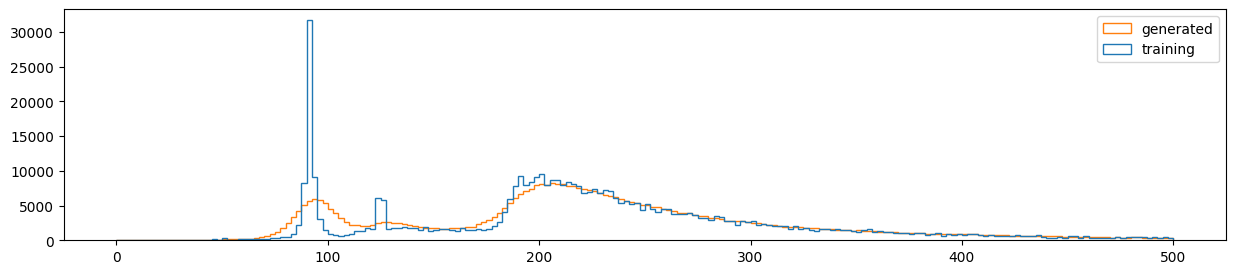

In [70]:
plt.figure(figsize=(15, 3))
plt.hist([m_values, m_values_g], bins=200, range=(0, 500), histtype='step', label=['training','generated'])
plt.legend()
plt.show()

# Training info

In [72]:
log = pd.read_csv('four_guys.csv.log')
log.head()

,epoch,loss,mse,val_loss,val_mse
0,0,0.009341,0.009281,0.000532,0.000449
1,1,0.000554,0.000470,0.001079,0.000993
2,2,0.000424,0.000339,0.000203,0.000117
3,3,0.000375,0.000291,0.000179,0.000094
4,4,0.000263,0.000177,0.000196,0.000110


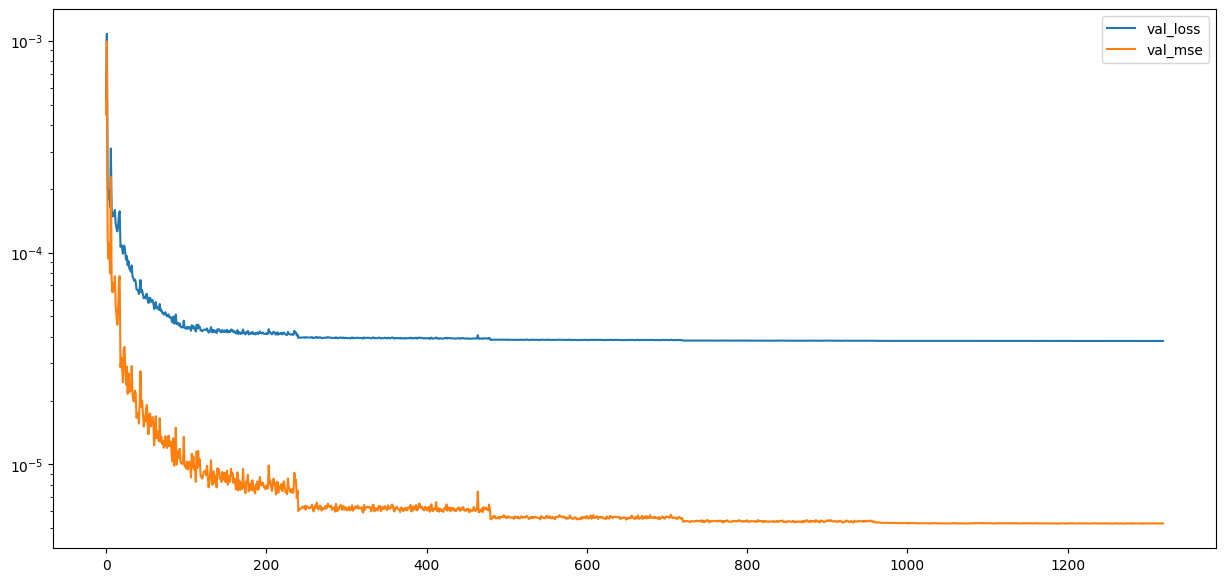

In [93]:
plt.figure(figsize=(15, 7))
plt.plot(log.index, log.val_loss, label='val_loss')
plt.plot(log.index, log.val_mse, label='val_mse')
# plt.plot(log.index, log.loss, label='loss')
# plt.plot(log.index, log.mse, label='mse')

#plt.xlim((-1, 500))
plt.yscale('log')
plt.legend()
plt.show()